In [1]:
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

In [12]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
sentences = ["king", "queen", "man", "woman","orange", "green apple","apple", "banana", "fruit", "computer", "laptop", "keyboard"]
embeddings = model.encode(sentences)

fun_value = embeddings[1]-embeddings[3]+embeddings[2];


In [13]:
embeddings.shape

(12, 768)

In [14]:
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
embeddings_2d = pca_2d.fit_transform(embeddings)

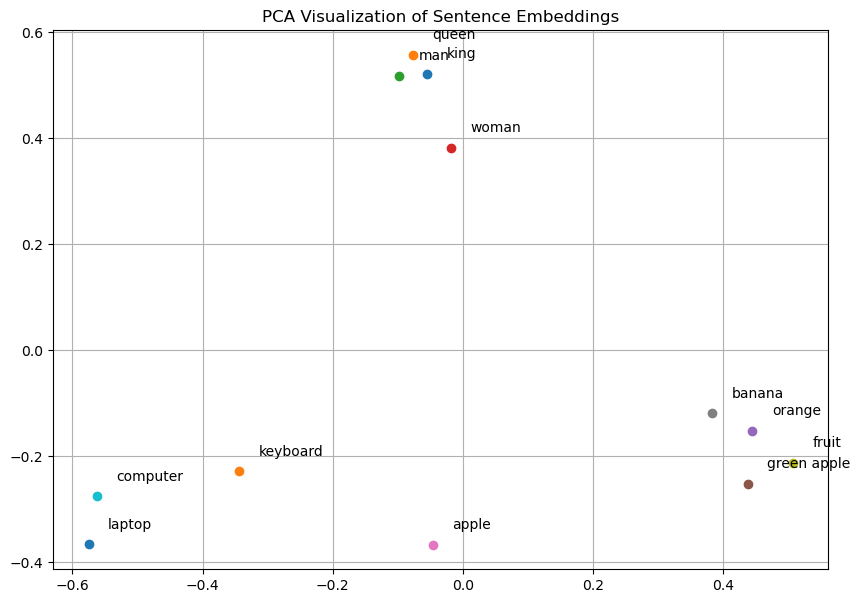

In [15]:
plt.figure(figsize=(10, 7))
for i, point in enumerate(embeddings_2d):
    plt.scatter(point[0], point[1])
    plt.text(point[0] + 0.03, point[1] + 0.03, sentences[i])
plt.title("PCA Visualization of Sentence Embeddings")
plt.grid(True)
plt.show()

================ 3D ================

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)
fun_value_3d = pca.transform(fun_value.reshape(1, -1))

embeddings_3d = np.concatenate((embeddings_3d, fun_value_3d), axis=0)
sentences.append("fun_value")

In [21]:
import plotly.graph_objects as go

fig = go.Figure()

# Add 3D scatter points
fig.add_trace(go.Scatter3d(
    x=[p[0] for p in embeddings_3d],
    y=[p[1] for p in embeddings_3d],
    z=[p[2] for p in embeddings_3d],
    mode='markers+text',
    text=sentences,  # Use raw text for clean labels
    textposition='top center',
    marker=dict(size=5, color='blue'),
))

fig.update_layout(
    title='3D PCA Projection of Sentence Embeddings (Interactive)',
    scene=dict(
        xaxis_title='Embedding X',
        xaxis_range=[-3,3],
        yaxis_title='Embedding Y',
        yaxis_range=[-3,3],
        zaxis_title='Embedding Z',
        zaxis_range=[-3,3],
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    height=700,
)

fig.show()

In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=[p[0] for p in embeddings_3d],
    y=[p[1] for p in embeddings_3d],
    z=[p[2] for p in embeddings_3d],
    mode='markers+text',
    text=sentences,
    textposition='top center',
    marker=dict(size=5, color='blue'),
))

fig.update_layout(
    title='3D PCA Projection of Sentence Embeddings (Interactive)',
    scene=dict(
        xaxis=dict(
            title='',
            showticklabels=True,
            range=[-4, 4],  # custom axis range
            showbackground=True,
        ),
        yaxis=dict(
            title='',
            showticklabels=True,
            range=[-4, 4],
            showbackground=True,
        ),
        zaxis=dict(
            title='',
            showticklabels=True,
            range=[-4, 4],
            showbackground=True,
        ),
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    height=700,
)
fig.show()